### 1. 환경 및 경로 설정

['./sample.txt']

In [108]:
import re
import pandas as pd; import datetime as dt; import numpy as np
import matplotlib.pyplot as plt
import locale; locale.setlocale(locale.LC_ALL, 'ko_KR.UTF-8')
import os
from glob import glob
datadir = './'
filelist = glob(datadir+'*.txt');filelist.sort();

# File selection
filename = filelist[-1]
print('Selected file -> :'+filename)


Selected file -> :./sample.txt


### 2. 텍스트 라인 포맷에 맞게 잘라내는 함수 정의

In [109]:
def parse_line( txt ):
  txt_split = txt.split(',')
  time_ = txt_split[0]+','+txt_split[1]
  id_ = txt_split[2].split(':')[0][1:-1].split('/')[0]
  contents_ = txt_split[2].split(':')[1][1:-1]
  contents_ = re.compile('[ㄱ-ㅎ|ㅏ-ㅣ]').sub('',contents_)
  return time_, id_, contents_

### 3. chat_data 폴더에 있는 모든 텍스트파일 긁어와서 list에 넣기 

In [110]:
lines, ids, times, institutes = [], [], [], []
for fileIdx in range(len(filelist)):
    #print('Opening .... Filename : [%s]'%datadir+filelist[fileIdx])
    chat = open(datadir+filelist[fileIdx], 'r', encoding="utf-8").readlines()[8:]
    for lineIdx in range(len(chat)):
        line = chat[lineIdx]
        if line is not '\n':
            try:
                time_, id_, contents_ = parse_line(line)
                ids.append(id_); 
                lines.append(contents_)
                times.append(time_); 
            except:
                pass
        
# Save option
saveOpt = True
if saveOpt:
    df = pd.DataFrame( {'timestamp':times, 'nickname':ids, "contents":lines })
    writer = pd.ExcelWriter('chat_data.xlsx', engine='xlsxwriter')
    df.to_excel(writer, sheet_name='Sheet1')
    writer.close()

### 4. 이름 별 채팅 횟수 계산 / Rank 나타내기

[Rank 01] 이재현 박사님: 32
[Rank 02] 효빈: 31
[Rank 03] 김보원 박사님: 22
[Rank 04] 김정영 경희대: 19
[Rank 05] 이규환: 12
[Rank 06] 이유진: 6
[Rank 07] 박지애: 4
[Rank 08] 김해온: 2


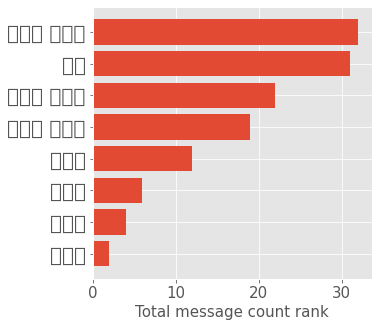

In [113]:
nicknames = df['nickname'].to_list()

# Count
from collections import Counter
count = dict( Counter(nicknames) )
names = list(count.keys())
counts = np.array(list(count.values()))

# Sort & formulate x, y data
rank = counts.argsort()
x,y=[],[]
for rankIdx in range(len(rank)-1,0,-1):
  print('[Rank %02d] %s: %d'%(len(rank)-rankIdx,names[rank[rankIdx]], counts[rank[rankIdx]]))
  x.append(names[rank[rankIdx]]); y.append(counts[rank[rankIdx]])

# Visualization
#plt.style.use('ggplot')
plt.figure(figsize=(5,5))
plt.barh(x, y)
ax = plt.gca(); ax.invert_yaxis(); #ax.set_xscale('log')
plt.xlabel('Total message count rank', fontsize=15)
ax.tick_params( axis='y', labelsize= 20 )
ax.tick_params( axis='x', labelsize= 15 )


### 5. 특정 이름 가진 사람만 분석하기

In [112]:
# 계산 편의를 위해 리스트로 변환
nicknames = df['nickname'].to_list()
timestamps = df['timestamp'].to_list()
contents = df['contents'].to_list()

target_id = '김정영'
times = [timestamps[i] for i in range(len(nicknames)) if target_id in nicknames[i]]
lines = [contents[i] for i in range(len(nicknames)) if target_id in nicknames[i]]

print(lines)
times

['다른분들은 목요일 11시 미팅 괜찮으신가요?', '저널클럽은 다음주 목요일 오전 11시로 미루겠습니다', '미팅을 다음주로 합치면 너무 길어지지않을까요?', '아 그럼 저널은 예정대로 다음주로 미룰까요? 아니면 그대로 진행할까요', '저는 오늘 학교에 제출할 게 있어서 학교로 가겠습니다', '혹시 nas 계정과 비밀번호 기억나는 분 계신가요??', '아 해결됬습니다', '저는 아닙니다', '저 다시 결제해야되서 금액 다를거에', '아 저 국가선택 잘못한게 아직 해결안되', '저도 괜찮습니다', '넵 감사합니다', 'jeelab 단톡방입니다!', '저는 괜찮습니다', '오늘 발표는 유진씨 -> 저 순서로 하겠습니다', '헉 넵넵  얼른 나아서 오세요', '넵 여기로 들어와주시면 됩니다', '저도 최박사님카드로 결제해서 아니에요', '넵 감사합니다']


['Aug 3, 2021 9:36 AM',
 'Aug 3, 2021 10:33 AM',
 'Aug 3, 2021 1:54 PM',
 'Aug 3, 2021 6:26 PM',
 'Aug 5, 2021 9:09 AM',
 'Aug 9, 2021 1:53 PM',
 'Aug 9, 2021 1:56 PM',
 'Aug 11, 2021 11:43 AM',
 'Aug 11, 2021 12:38 PM',
 'Aug 11, 2021 12:56 PM',
 'Aug 11, 2021 3:24 PM',
 'Aug 12, 2021 11:28 AM',
 'Aug 12, 2021 11:31 AM',
 'Aug 12, 2021 2:20 PM',
 'Aug 17, 2021 11:58 AM',
 'Aug 17, 2021 4:46 PM',
 'Aug 19, 2021 10:20 AM',
 'Aug 19, 2021 4:24 PM',
 'Aug 25, 2021 3:28 PM']